### **Lab 4: Econometrics**

In [80]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [81]:
# Set seed for reproducibility
np.random.seed(123)

# Set up vector of x coordinates (repeating values)
x = np.repeat([10, 15, 20, 25], repeats=25)

# Initialize error vector
e = np.zeros(100)

In [82]:
# Sample 100 errors such that variance increases with x
e[:25] = np.random.normal(scale=10, size=25)
e[25:50] = np.random.normal(scale=15, size=25)
e[50:75] = np.random.normal(scale=20, size=25)
e[75:100] = np.random.normal(scale=25, size=25)

In [83]:
# Set up y
y = 720 - 3.3 * x + e

# Convert to DataFrame for better handling
df = pd.DataFrame({'x': x, 'y': y})

In [84]:
mod = smf.ols('y ~ x', data=df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     85.59
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           5.10e-15
Time:                        09:47:17   Log-Likelihood:                -441.34
No. Observations:                 100   AIC:                             886.7
Df Residuals:                      98   BIC:                             891.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    720.9974      6.631    108.728      0.0

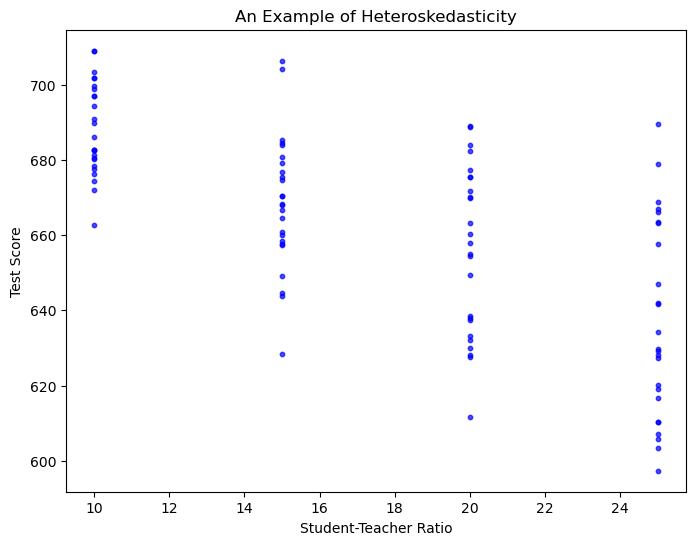

In [85]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", s=10, alpha=0.7)  # s controls size (equivalent to cex), alpha controls transparency

# Add titles and labels
plt.title("An Example of Heteroskedasticity")
plt.xlabel("Student-Teacher Ratio")
plt.ylabel("Test Score")


# Show the plot
plt.show()


Text(0, 0.5, 'Test Score')

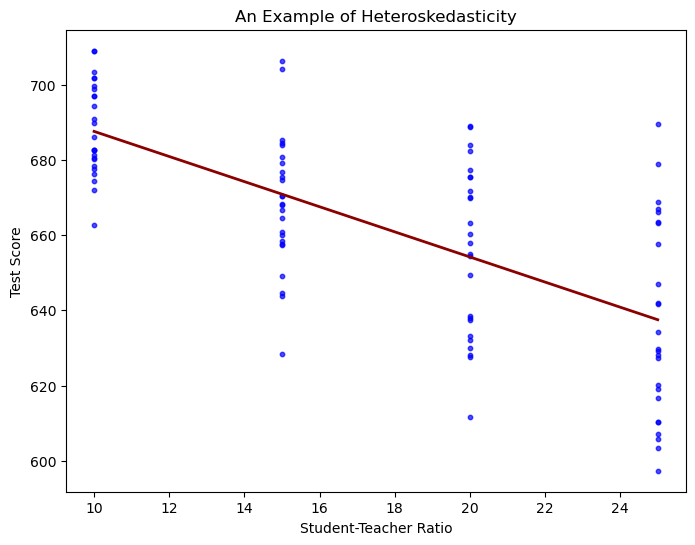

In [86]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", s=10, alpha=0.7, label="Observed Data")

# Add the regression line to the plot
plt.plot(x, mod.predict(), color="darkred", linewidth=2, label="Regression Line")

# Add titles and labels
plt.title("An Example of Heteroskedasticity")
plt.xlabel("Student-Teacher Ratio")
plt.ylabel("Test Score")

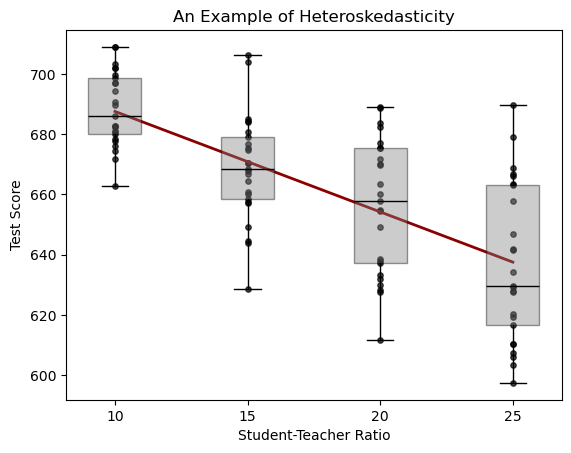

In [87]:
import seaborn as sns

plt.scatter(x, y, color="black", s=15, alpha=0.7, label="Data")
plt.plot(x, mod.predict(), color="darkred", linewidth=2, label="Regression Line")

positions = [10, 15, 20, 25]
box_data = [y[x == pos] for pos in positions]
plt.boxplot(box_data, positions=positions, widths=2, patch_artist=True,
            boxprops=dict(facecolor='gray', color='black', alpha=0.4),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

plt.title("An Example of Heteroskedasticity")
plt.xlabel("Student-Teacher Ratio")
plt.ylabel("Test Score")


# Mostrar la gráfica
plt.show()


For this artificial data it is clear that the conditional error variances differ.
Specifically, we observe that the variance in test scores (and therefore the variance of the errors committed) increases
with the student teacher ratio.

 How responsive are private transfers to income? Evidence from a laissez-faire economy

 Donald Cox, Bruce E. Hansen, Emmanuel Jimenez

In [88]:
#load data
Data_File = "https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%204/data/CHJ2004.txt"
Data = pd.read_csv(Data_File, sep='\s+', engine='python')

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/0t/ntgswrhs3dx166nwrng5gqwh0000gn/T/ipykernel_20074/3719069168.py:3: SyntaxWarning: invalid escape sequence '\s'
  Data = pd.read_csv(Data_File, sep='\s+', engine='python')


In [89]:
#get summary statistics
Data.shape

(8684, 28)

In [90]:
Data.describe()

,tabroad,tdomestic,tinkind,tgifts,income,wage,entrepreneourial,rental,interest,pension,...,married,child1,child7,child15,size,bothwork,notemployed,marriedf,region,transfers
count,8684.000000,8684.000000,8684.000000,8684.000000,8684.000000,8684.000000,8684.000000,8684.000000,8684.000000,8684.000000,...,8684.000000,8684.0000,8684.000000,8684.000000,8684.000000,8684.000000,8684.000000,8684.000000,8684.000000,8684.000000
mean,4911.966490,1067.726854,1729.322202,268.831875,45229.153155,26299.542262,11792.227199,657.564717,142.189659,1003.302856,...,0.829572,0.1117,0.776601,1.064371,5.300092,0.304698,0.169047,0.049747,4.352602,7440.183671
std,18082.915272,3944.543854,4995.612006,1273.182194,39959.523370,30101.663021,24220.918176,4759.064145,2205.725617,8538.682989,...,0.376030,0.3321,0.972062,1.204383,2.265005,0.460306,0.374815,0.217434,3.969542,19904.431645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-51960.000000
25%,0.000000,0.000000,0.000000,0.000000,19959.500000,415.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.0000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,0.000000,0.000000,409.500000,0.000000,33350.000000,19295.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.0000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,4.000000,1038.500000
75%,0.000000,500.000000,1500.000000,140.000000,57309.250000,37200.000000,14442.500000,0.000000,0.000000,0.000000,...,1.000000,0.0000,1.000000,2.000000,7.000000,1.000000,0.000000,0.000000,7.000000,5357.250000
max,512000.000000,110000.000000,126610.000000,57200.000000,284310.000000,258438.000000,284160.000000,182000.000000,170000.000000,370672.000000,...,1.000000,4.0000,6.000000,8.000000,23.000000,1.000000,1.000000,1.000000,13.000000,512260.000000


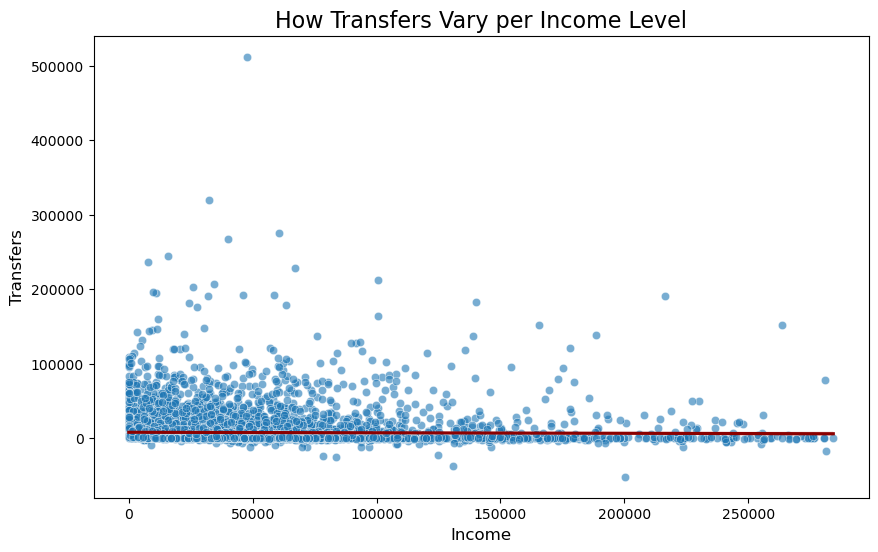

In [91]:
#how does transfer vary per income level

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='income', y='transfers',  alpha=0.6, )
sns.regplot(data=Data, x='income', y='transfers', scatter=False, color='darkred', label="Smoothed Line")

plt.title("How Transfers Vary per Income Level", fontsize=16)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Transfers", fontsize=12)


plt.show()

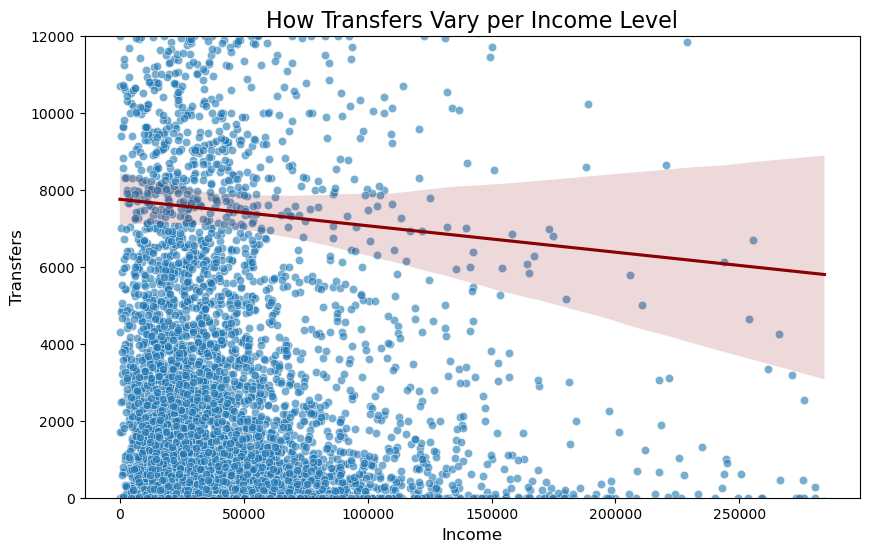

In [92]:
#lets look into things a bit dipper
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='income', y='transfers',  alpha=0.6, )
sns.regplot(data=Data, x='income', y='transfers', scatter=False, color='darkred', label="Smoothed Line")

plt.title("How Transfers Vary per Income Level", fontsize=16)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Transfers", fontsize=12)
plt.ylim(0, 12000)

plt.show()